# EE679 - Speech Processing
## Assignment 1
## Keshav Singhal 20D070047

In [1]:
#importing useful libraries

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,14)
import numpy as np
import timeit
from scipy.signal import impulse

## 1. Given the following specification for a single-formant resonator, obtain the transfer function of the filter H(z) from the relation between resonance frequency / bandwidth, and the pole angle / radius. Plot filter magnitude response (dB magnitude versus frequency) and impulse response.
### F1 (formant) = 900 Hz B1(bandwidth) = 200 Hz
### Fs (sampling freq) = 16 kHz

Pole radius (ρ): 0.9614911598014075
Pole angle (θ): 0.3534291735288517
Transfer function coefficients (b): [1]
Transfer function coefficients (a): [1, -1.8041253513834825, 0.9244652503762558]


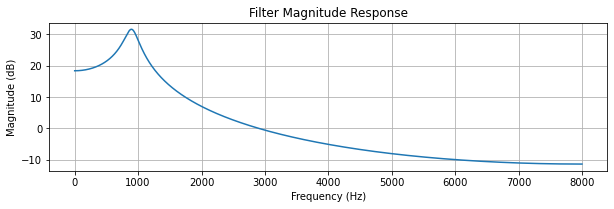

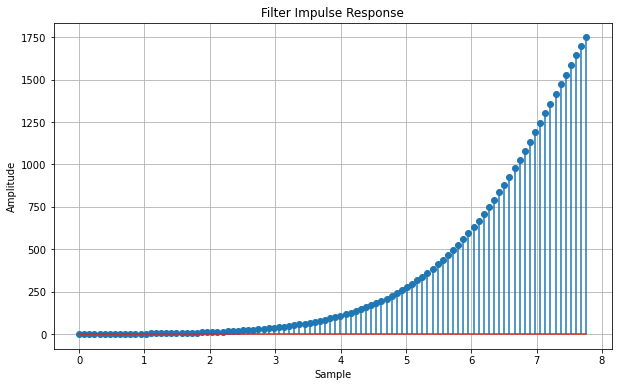

In [2]:
# Function to generate Frequency Response
def freq_response(b, a, num_points=8000, Fs=16000):
    w = np.linspace(0, np.pi, num_points)
    H = np.polyval(b, np.exp(1j * w)) / np.polyval(a, np.exp(1j * w))
    frequencies = (w / np.pi) * (Fs / 2)
    magnitude_dB = 20 * np.log10(np.abs(H))
    return frequencies, magnitude_dB

#Parameters given
F1 = 900 
B1 = 200  
Fs = 16000 

ρ = np.exp(-np.pi * B1 / Fs)
θ = 2 * np.pi * F1 / Fs
b = [1]
a = [1, -2 * ρ * np.cos(θ), ρ**2]


print("Pole radius (ρ):", ρ)
print("Pole angle (θ):", θ)
print("Transfer function coefficients (b):", b)
print("Transfer function coefficients (a):", a)

frequencies, magnitude_dB = freq_response(b, a, Fs=Fs)

#Plot of Frequency Response
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies, magnitude_dB)
plt.title("Filter Magnitude Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

#Finding the impulse response
n, impulse_response = impulse((b, a))

#Plot of Impulse Response
plt.figure(figsize=(10, 6))
plt.stem(n, impulse_response)
plt.title("Filter Impulse Response")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## 2. Excite the above resonator (“filter”) with a periodic source excitation of F0 = 160 Hz. You can approximate the source signal by a narrow-triangular pulse train. Compute the output of the source-filter system over the duration of 0.5 second using the difference equation implementation of the LTI system. Plot the time domain waveform over a few pitch periods so that you can observe waveform characteristics. Play out the 0.5 sec duration sound and comment on the sound quality.


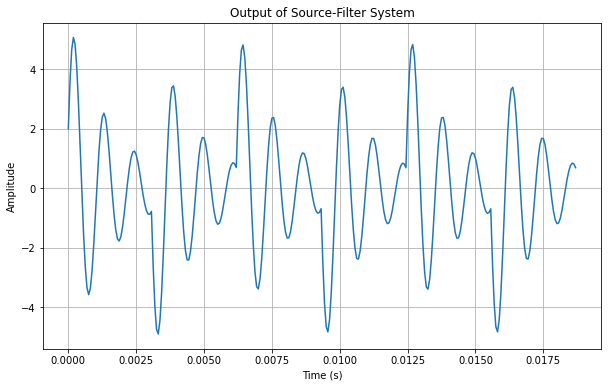

In [3]:
from scipy.io import wavfile
import sounddevice as sd


F1 = 900  
B1 = 200 
Fs = 16000  
F0 = 160  

ρ = np.exp(-np.pi * B1 / Fs) #Pole radius
θ = 2 * np.pi * F1 / Fs #Pole angle 
b = [1] #Transfer function coefficients (b)
a = [1, -2 * ρ * np.cos(θ), ρ**2] #Transfer function coefficients (a)

num_samples = int(0.5 * Fs)  # Duration is 0.5 seconds
num_periods = int(Fs / F0)
source = np.zeros(num_samples)
source[::num_periods] = 1
source = source - np.roll(source, int(num_periods/2))


filtered_output = np.zeros_like(source)
for n in range(len(source)):
    output_sample = b[0] * source[n]
    for k in range(1, len(a)):
        if n - k >= 0:
            output_sample -= a[k] * filtered_output[n - k]
    for k in range(len(b)):
        if n - k >= 0:
            output_sample += b[k] * source[n - k]
    filtered_output[n] = output_sample

num_plot_samples = int(3 * Fs / F0)
time_axis = np.arange(num_plot_samples) / Fs
plt.figure(figsize=(10, 6))
plt.plot(time_axis, filtered_output[:num_plot_samples])
plt.title("Output of Source-Filter System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


scaled_output = np.int16(filtered_output / np.max(np.abs(filtered_output)) * 32767)

sd.play(scaled_output, Fs)
sd.wait()


### The sound quality might have a nasal or resonant character due to the filtering effect of the resonator on the input signal. The quality of the sound can vary based on the parameters of the resonator and the source signal.

## 3. Vary the parameters as indicated below; plot and comment on the differences in waveform and in sound quality for the different parameter combinations.

### (a) F0=120Hz,F1=300Hz,B1=120Hz

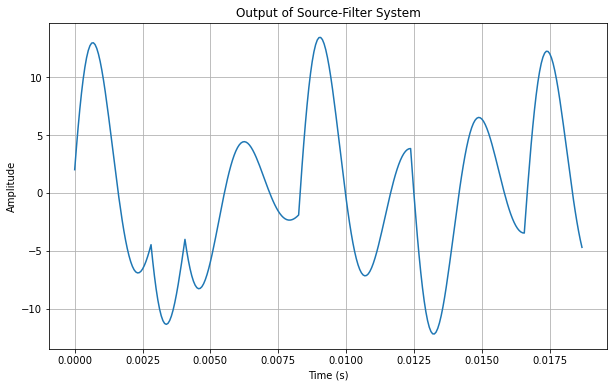

In [4]:
F0_a = 120  
F1_a = 300  
B1_a = 120  


ρ_a = np.exp(-np.pi * B1_a / Fs)
θ_a = 2 * np.pi * F1_a / Fs
b_a = [1]
a_a = [1, -2 * ρ_a * np.cos(θ_a), ρ_a**2]


source_a = np.zeros(num_samples)
source_a[::int(Fs / F0_a)] = 1
source_a = source_a - np.roll(source_a, int(Fs / (2 * F0_a)))


filtered_output_a = np.zeros_like(source_a)
for n in range(len(source_a)):
    output_sample = b_a[0] * source_a[n]
    for k in range(1, len(a_a)):
        if n - k >= 0:
            output_sample -= a_a[k] * filtered_output_a[n - k]
    for k in range(len(b_a)):
        if n - k >= 0:
            output_sample += b_a[k] * source_a[n - k]
    filtered_output_a[n] = output_sample


num_plot_samples = int(3 * Fs / F0)
time_axis = np.arange(num_plot_samples) / Fs
plt.figure(figsize=(10, 6))
plt.plot(time_axis, filtered_output_a[:num_plot_samples])
plt.title("Output of Source-Filter System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


scaled_output = np.int16(filtered_output_a / np.max(np.abs(filtered_output_a)) * 32767)
wavfile.write("output_sound.wav", Fs, scaled_output)


sd.play(scaled_output, Fs)
sd.wait()

### b) F0 = 120 Hz, F1=1100 Hz, B1 = 200 Hz

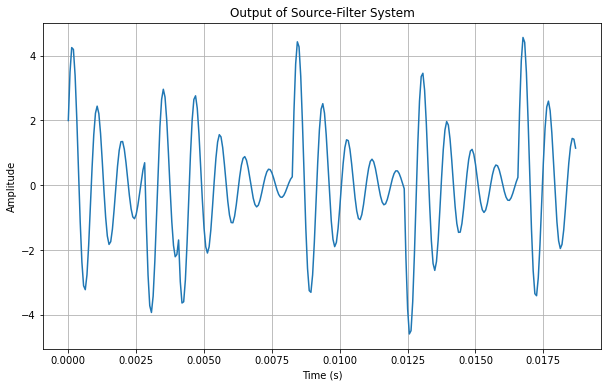

In [5]:
F0_b = 120  
F1_b = 1100 
B1_b = 200 

ρ_b = np.exp(-np.pi * B1_b / Fs)
θ_b = 2 * np.pi * F1_b / Fs
b_b = [1]
a_b = [1, -2 * ρ_b * np.cos(θ_b), ρ_b**2]

source_b = np.zeros(num_samples)
source_b[::int(Fs / F0_b)] = 1
source_b = source_b - np.roll(source_b, int(Fs / (2 * F0_b)))


filtered_output_b = np.zeros_like(source_b)
for n in range(len(source_b)):
    output_sample = b_b[0] * source_b[n]
    for k in range(1, len(a_b)):
        if n - k >= 0:
            output_sample -= a_b[k] * filtered_output_b[n - k]
    for k in range(len(b_b)):
        if n - k >= 0:
            output_sample += b_b[k] * source_b[n - k]
    filtered_output_b[n] = output_sample

num_plot_samples = int(3 * Fs / F0)
time_axis = np.arange(num_plot_samples) / Fs
plt.figure(figsize=(10, 6))
plt.plot(time_axis, filtered_output_b[:num_plot_samples])
plt.title("Output of Source-Filter System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

scaled_output = np.int16(filtered_output_b / np.max(np.abs(filtered_output_b)) * 32767)
wavfile.write("output_sound.wav", Fs, scaled_output)


sd.play(scaled_output, Fs)
sd.wait()


### c) F0=180Hz,F1=300Hz,B1=120Hz

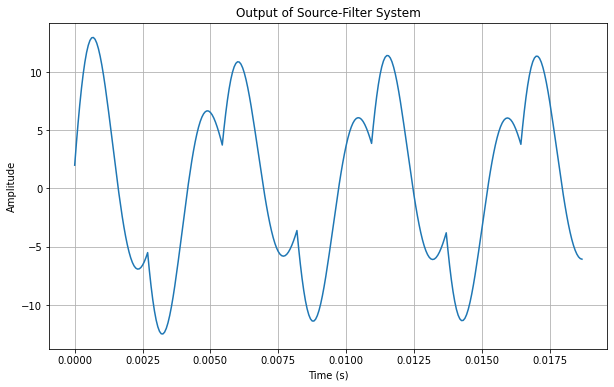

In [6]:

F0_c = 180  
F1_c = 300  
B1_c = 120  


ρ_c = np.exp(-np.pi * B1_c / Fs)
θ_c = 2 * np.pi * F1_c / Fs
b_c = [1]
a_c = [1, -2 * ρ_c * np.cos(θ_c), ρ_c**2]


source_c = np.zeros(num_samples)
source_c[::int(Fs / F0_c)] = 1
source_c = source_c - np.roll(source_c, int(Fs / (2 * F0_c)))


filtered_output_c = np.zeros_like(source_c)
for n in range(len(source_c)):
    output_sample = b_c[0] * source_c[n]
    for k in range(1, len(a_c)):
        if n - k >= 0:
            output_sample -= a_c[k] * filtered_output_c[n - k]
    for k in range(len(b_c)):
        if n - k >= 0:
            output_sample += b_c[k] * source_c[n - k]
    filtered_output_c[n] = output_sample


num_plot_samples = int(3 * Fs / F0)
time_axis = np.arange(num_plot_samples) / Fs
plt.figure(figsize=(10, 6))
plt.plot(time_axis, filtered_output_c[:num_plot_samples])
plt.title("Output of Source-Filter System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


scaled_output = np.int16(filtered_output_c / np.max(np.abs(filtered_output_c)) * 32767)
wavfile.write("output_sound.wav", Fs, scaled_output)


sd.play(scaled_output, Fs)
sd.wait()


## 4. In place of the simple single-resonance signal, synthesize the following more realistic vowel sounds at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz). Keep the bandwidths constant at 100 Hz for all formants. Duration of sound: 0.5 sec. Comment on the sound quality across the different sounds. Plot a few periods of any 2 examples.

### Vowel F1, F2, F3
### a) /a/ 730, 1090, 2440 
### b) /i/ 270, 2290, 3010 
### c) /u/ 300, 870, 2240

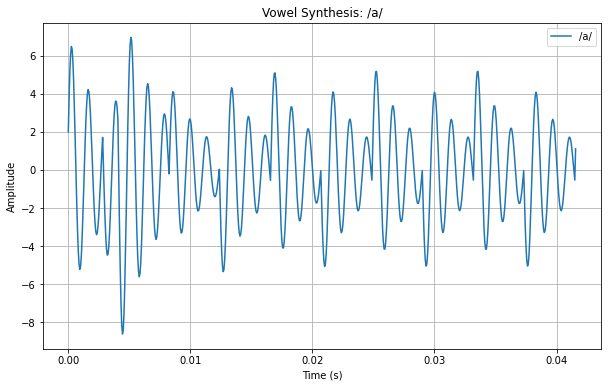

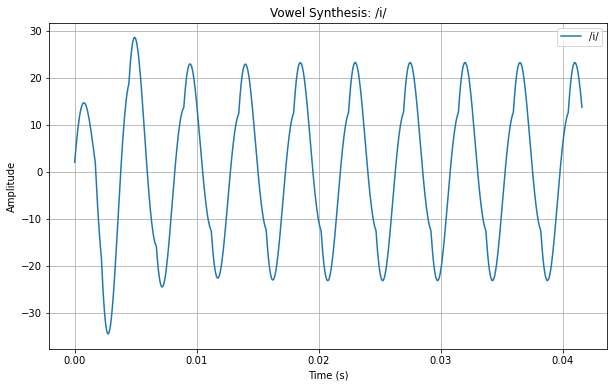

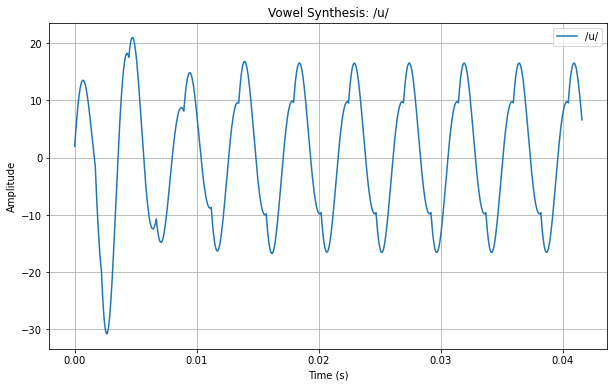

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd

def generate_vowel_sound(F0, F1, F2, F3, Fs):
    num_samples = int(0.5 * Fs)  
    num_periods = int(Fs / F0)
    source = np.zeros(num_samples)
    source[::num_periods] = 1
    source = source - np.roll(source, int(num_periods / 2))

    ρ = np.exp(-np.pi * 100 / Fs)  
    θ1 = 2 * np.pi * F1 / Fs
    θ2 = 2 * np.pi * F2 / Fs
    θ3 = 2 * np.pi * F3 / Fs
    b = [1]
    a = [1, -2 * ρ * np.cos(θ1), ρ**2]

    filtered_output = np.zeros_like(source)
    for n in range(len(source)):
        output_sample = b[0] * source[n]
        for k in range(1, len(a)):
            if n - k >= 0:
                output_sample -= a[k] * filtered_output[n - k]
        for k in range(len(b)):
            if n - k >= 0:
                output_sample += b[k] * source[n - k]
        filtered_output[n] = output_sample

    return filtered_output

def play_sound(sound, Fs):
    scaled_output = np.int16(sound / np.max(np.abs(sound)) * 32767)
    wavfile.write("output_sound.wav", Fs, scaled_output)
    sd.play(scaled_output, Fs)
    sd.wait()

Fs = 16000  


F0_a = 120  
F1_a, F2_a, F3_a = 730, 1090, 2440
vowel_a = generate_vowel_sound(F0_a, F1_a, F2_a, F3_a, Fs)

F0_i = 220  
F1_i, F2_i, F3_i = 270, 2290, 3010
vowel_i = generate_vowel_sound(F0_i, F1_i, F2_i, F3_i, Fs)

F0_u = 220  
F1_u, F2_u, F3_u = 300, 870, 2240
vowel_u = generate_vowel_sound(F0_u, F1_u, F2_u, F3_u, Fs)

num_periods_plot = 5
num_samples_plot = int(num_periods_plot * Fs / F0_a)
time_axis = np.arange(num_samples_plot) / Fs

plt.figure(figsize=(10, 6))
plt.plot(time_axis, vowel_a[:num_samples_plot], label='/a/')
plt.title("Vowel Synthesis: /a/")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_axis, vowel_i[:num_samples_plot], label='/i/')
plt.title("Vowel Synthesis: /i/")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_axis, vowel_u[:num_samples_plot], label='/u/')
plt.title("Vowel Synthesis: /u/")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

play_sound(vowel_a, Fs)
play_sound(vowel_i, Fs)
play_sound(vowel_u, Fs)


### The differences arise from the variation in formant frequencies and their interactions with the source signal. One can observe how the differences in formant frequencies contribute to the perceived characteristics of each vowel sound, such as openness, resonance, and clarity.